# Lenet   CIFAR

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as f
import sys
import torch.optim as optim
import os

## lenet

In [2]:


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = f.relu(self.conv1(x))
        x = f.max_pool2d(x, 2)
        x = f.relu(self.conv2(x))
        x = f.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_home = 'F:\\work'
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10(root=os.path.join(data_home, 'dataset/CIFAR10'), train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10(root=os.path.join(data_home, 'dataset/CIFAR10'), train=False, download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True, num_workers=2)

## show some example

In [5]:
def imshow(img):
#     img = img * 0.3081 + 0.1307
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

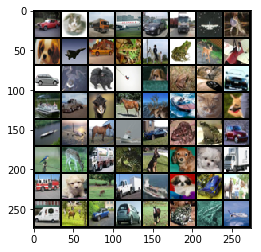

tensor([1, 3, 9, 0, 1, 9, 0, 6, 5, 0, 1, 6, 7, 6, 4, 0, 1, 6, 5, 0, 5, 6, 3, 1,
        8, 9, 2, 7, 4, 8, 3, 5, 8, 0, 7, 8, 1, 6, 6, 1, 2, 4, 9, 6, 5, 5, 5, 9,
        9, 5, 4, 9, 8, 5, 1, 7, 9, 4, 1, 1, 7, 6, 6, 0])


In [7]:
imshow(torchvision.utils.make_grid(images))
print(labels)

# 训练

In [8]:
lr = 0.001
epochs = 200

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LeNet()

model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[75, 150], gamma=0.5)
criterion = nn.CrossEntropyLoss().to(DEVICE)


In [9]:

for epoch in range(epochs):

    train_loss = 0
    train_correct = 0
    total = 0
    model.train()
    scheduler.step(epoch)
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        prediction = torch.max(output, 1)  # second param "1" represents the dimension to be reduced
        total += target.size(0)

        # train_correct incremented by one if predicted right
        train_correct += np.sum(prediction[1].cpu().numpy() == target.cpu().numpy())

        print('\r{}:  Loss: {},  Acc:{}'.format(batch_num, train_loss / (batch_num + 1), train_correct / total), end='')
    
    model.eval()
    test_loss = 0
    test_correct = 0
    total = 0
    with torch.no_grad():
        for batch_num, (data, target) in enumerate(test_loader):
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            prediction = torch.max(output, 1)
            total += target.size(0)
            test_correct += np.sum(prediction[1].cpu().numpy() == target.cpu().numpy())
        test_loss, test_correct / total
    print('epoch {} Test:   Loss:{}, Acc:{}'.format(epoch, test_loss, test_correct/total))

D:\software\anaconda\lib\site-packages\torch\optim\lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


781:  Loss: 1.9684007431540038,  Acc:0.26494478873239443epoch 0 Test:   Loss:278.4344229698181, Acc:0.3576
781:  Loss: 1.6994934841190152,  Acc:0.37676556978233054epoch 1 Test:   Loss:254.74330878257751, Acc:0.4068
781:  Loss: 1.5925470351258202,  Acc:0.41774674775928347epoch 2 Test:   Loss:246.90335762500763, Acc:0.4294
781:  Loss: 1.5326295966077643,  Acc:0.44202145966709354epoch 3 Test:   Loss:234.6815892457962, Acc:0.4554
781:  Loss: 1.4919400084049195,  Acc:0.45788654289372654epoch 4 Test:   Loss:229.7036863565445, Acc:0.4683
781:  Loss: 1.4593773731185347,  Acc:0.47132080665813066epoch 5 Test:   Loss:224.4432487487793, Acc:0.4819
781:  Loss: 1.4253485192118398,  Acc:0.48618557618437904epoch 6 Test:   Loss:224.25142693519592, Acc:0.4828
781:  Loss: 1.3966771539519816,  Acc:0.49566636363636357epoch 7 Test:   Loss:216.51974564790726, Acc:0.503
781:  Loss: 1.372831464728431,  Acc:0.506742215108834836epoch 8 Test:   Loss:214.4551649093628, Acc:0.506
781:  Loss: 1.3481923837948333,  Ac

781:  Loss: 0.6432144187981516,  Acc:0.7756882266325224epoch 151 Test:   Loss:162.32578939199448, Acc:0.665
781:  Loss: 0.6429252680152884,  Acc:0.7757682522407174epoch 152 Test:   Loss:164.45265793800354, Acc:0.6615
781:  Loss: 0.6382258313010111,  Acc:0.7774087708066582epoch 153 Test:   Loss:164.47467809915543, Acc:0.6596
781:  Loss: 0.6391926243939363,  Acc:0.7748279385403329epoch 154 Test:   Loss:167.37386518716812, Acc:0.6568
781:  Loss: 0.6384061988814712,  Acc:0.7765484699103713epoch 155 Test:   Loss:164.33295214176178, Acc:0.663
781:  Loss: 0.6346693394891442,  Acc:0.7767885403329066epoch 156 Test:   Loss:162.6535896062851, Acc:0.6654
781:  Loss: 0.6383633096047374,  Acc:0.7743477848911652epoch 157 Test:   Loss:162.17809158563614, Acc:0.6674
781:  Loss: 0.6303166585124057,  Acc:0.7779289372599232epoch 158 Test:   Loss:163.7387986779213, Acc:0.6646
781:  Loss: 0.629136393708951,  Acc:0.77744487836107554epoch 159 Test:   Loss:162.85587006807327, Acc:0.6648
781:  Loss: 0.630015412

In [10]:
 # 保存
model_save_path = "../model/Lenet_CIFAR.pt"
torch.save(model.state_dict(), model_save_path)
print("Checkpoint saved to {}".format(model_save_path))

Checkpoint saved to ../model/Lenet_CIFAR.pt
